<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import cross_val_score,train_test_split,KFold
import statsmodels.api as sm
from statsmodels.api import add_constant

#### Read the data

Load the csv file and set the first column as index

In [2]:
df1= pd.read_csv("car_data.csv",index_col=0)
df1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name,,,,,,,,
ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df1.shape

(301, 8)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, ritz to brio
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 21.2+ KB


In [5]:
df1.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


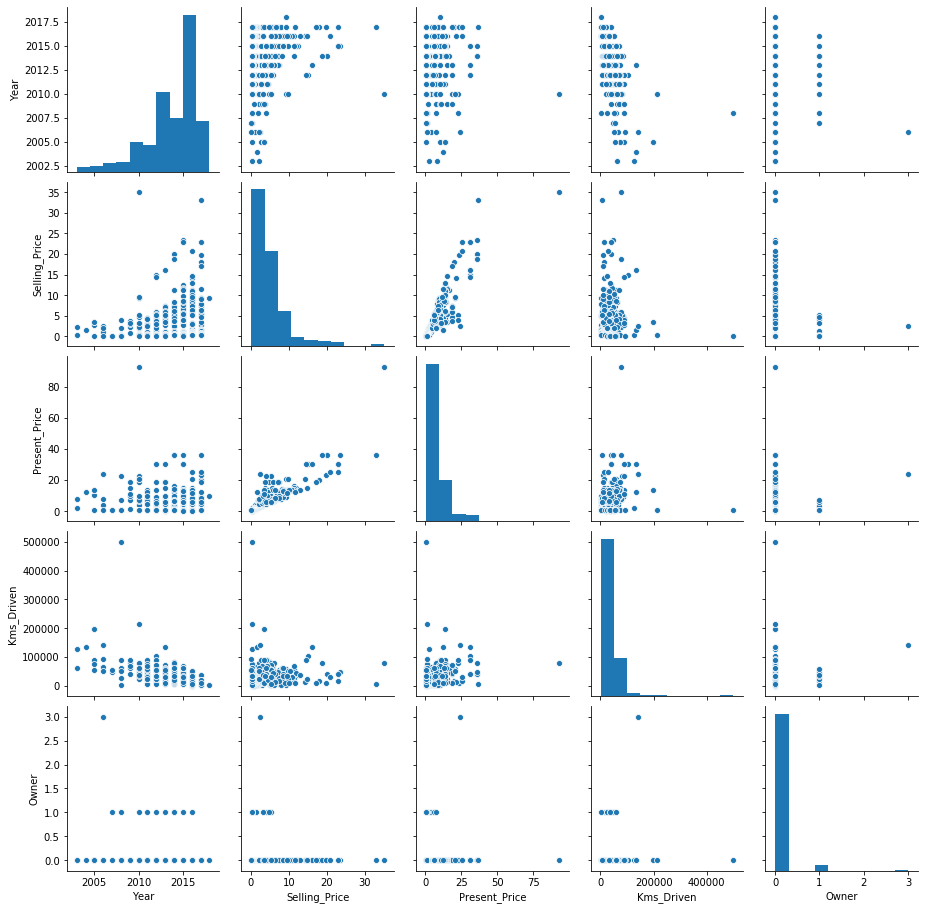

In [6]:
sns.pairplot(df1)

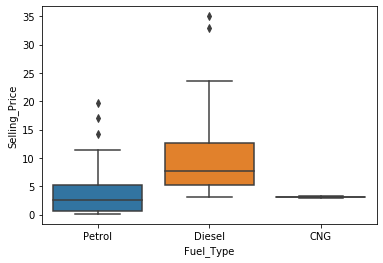

In [7]:
sns.boxplot(x=df1['Fuel_Type'],y=df1['Selling_Price'])

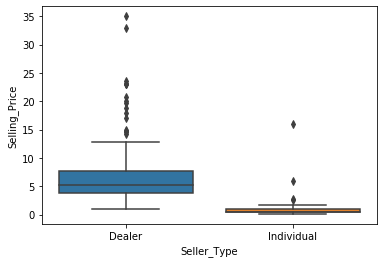

In [8]:
sns.boxplot(x=df1['Seller_Type'],y=df1['Selling_Price'])

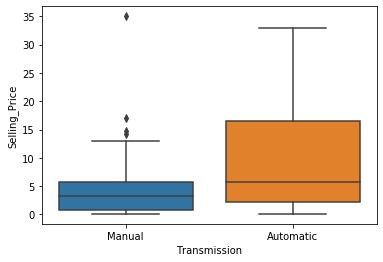

In [9]:
sns.boxplot(x=df1['Transmission'],y=df1['Selling_Price'])

In [10]:
df1_target = df1['Selling_Price']

In [11]:
df1_feature = df1.drop('Selling_Price', axis = 1)

In [12]:
df1_num = df1_feature.select_dtypes(include=[np.number])

In [13]:
# display numerical features
df1_num.columns

Index(['Year', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

In [14]:
df1_cat = df1_feature.select_dtypes(include=[np.object])

# display categorical features

df1_cat.columns

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [15]:
dummy_var = pd.get_dummies(data = df1_cat, drop_first=True)

In [16]:
X_final = pd.concat([df1_num, dummy_var], axis=1)

Our objective is to predict the selling price of the cars data.

**The data definition is as follows:** <br><br>
**Car_Name:** name of the car <br>

**YearThis:** year in which the car was bought <br>

**Present_Price:** current ex-showroom price of the car (in lakhs)<br>

**Kms_Driven:** distance completed by the car in km <br>

**Fuel_Type:** fuel type of the car <br>

**Seller_Type:** defines whether the seller is a dealer or an individual<br>

**Transmission:** defines whether the car is manual or automatic <br>

**Owner:** defines the number of owners the car has previously had <br>

**Selling_Price:** price the owner wants to sell the car at (in lakhs) (response variable)

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Build a full model and interpret the beta coefficients </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
# display first five observations
X_final.head()

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Car_Name,,,,,,,,
ritz,2014,5.59,27000,0,0,1,0,1
sx4,2013,9.54,43000,0,1,0,0,1
ciaz,2017,9.85,6900,0,0,1,0,1
wagon r,2011,4.15,5200,0,0,1,0,1
swift,2014,6.87,42450,0,1,0,0,1


In [18]:
df1_target.head()

Car_Name
ritz       3.35
sx4        4.75
ciaz       7.25
wagon r    2.85
swift      4.60
Name: Selling_Price, dtype: float64

        Hint: A full model is a model which includes all the features 

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(X_final,df1_target,test_size=0.3,random_state=0)

In [20]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((210, 8), (91, 8), (210,), (91,))

In [21]:
# Defining Model

In [22]:
LR=LinearRegression()

In [23]:
LR.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
# Checking Model parameters

In [24]:
LR.coef_

array([ 3.65880403e-01,  3.98445025e-01, -5.90564851e-06, -8.25707298e-01,
        2.66931493e+00,  6.58316440e-01, -1.37943357e+00, -1.32870522e+00])

In [26]:
LR.intercept_

-734.392110409213

In [28]:
LR.score(xtrain,ytrain)

0.8926207626208046

In [36]:
#Calculate training error
y_pred_train=LR.predict(xtrain)
mse_train=np.mean((ytrain-y_pred_train)**2)
rmse_train=np.sqrt(mse_train)
print('Training error:',rmse_train)

Training error: 1.599057019337421


In [37]:
#Calculate test error
y_pred_test=LR.predict(xtest)
mse_test=np.mean((ytest-y_pred_test)**2)
rmse_test=np.sqrt(mse_test)
print('Testing error:',rmse_test)

Testing error: 2.1052620420432993


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is there multicollinearity present? If yes, which variables are involved in multicollinearity?    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the impact of present price of the car and seller type on the selling price?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Consider all the numeric features in the data. Do all of them significantly contribute to explaining the variation in the selling price?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. In the model obtained in question 4, consider the interaction effect of the present price of the car and the year in which it was purchased. Compare the resultant model with the model obtained in previous question and give your interpretation 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What is the impact of fuel type of cars on the selling price? 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Does the model significantly explain variation in the target variable? Justify your answer with analysis of variation 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

            Regress the selling price over the transmission.
            
            Selling_Price ~ Transmission

In [9]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Regress the selling price over the present price. Compare the 99% and 95% confidence interval of present price of a car
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>9. Verify the statement: The sum of the residuals in any regression model that contains an intercept β<sub>0</sub> is always zero
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

        To verify the result, we will fit a regression model of 'Present_Price' on 'Selling_Price' 

In [11]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Consider two models as specified below. Compare the performance of the models
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

                First model:
        
        Selling_Price ~ Year + Present_Price + Kms_Driven + Owner + Fuel_Type + Seller_Type + Transmission
        
        
                Second model:
        
        Selling_Price ~ Year + Present_Price + Kms_Driven + Owner 

In [12]:
# type your code here